# Figures
by: J Plumlee 
2023-03-09

In [21]:
#Below: maybe there is an option to suppress the ugly library warning messages
library(ggplot2)
library(dplyr)
library(tidyr) 
library(mgcv)
library(lubridate)

In [22]:
#Read the file
dirname <- getwd()
filename <- 'all_species_enviro.csv'
df <- read.csv(file.path(dirname,filename))
cat("File",filename,"has",nrow(df),"rows,",ncol(df),"columns")

File all_species_enviro.csv has 626 rows, 53 columns

## Pelagic
`p_prey` = Pelagic prey excluding Butterfish, omit `NaN`

We exclude Butterfish because ... (?)

[NOAA: What are pelagic fish?](https://oceanservice.noaa.gov/facts/pelagic.html) *Pelagic fish inhabit the water column (not near the bottom or the shore) of coasts, open oceans, and lakes.*

In [23]:
#Pelagic Prey 
p_prey <- df[df$group == "Pelagic Prey",]
#except Butterfish
nrow(p_prey)
p_prey <- na.omit(p_prey[p_prey$species != "Butterfish",])
nrow(p_prey)

[1] 229

[1] 191

## Benthic
`b_prey` = Benthic prey excluding Mojarra, omit `NaN`

In [24]:
#Benthic Prey except Mojarra
b_prey <- df[df$group == "Benthic Prey",]
nrow(b_prey)
b_prey <- na.omit(b_prey[b_prey$species != "Mojarra",])
nrow(b_prey)

[1] 164

[1] 128

## Fishery Species

I write the nrow because personally like to check how many things are being excluded.  You can remove anything I stuck in here...the user can add for themselve when they go through the notebook, if they like to check things like that.

In [25]:
f_spec <- df[df$group == "Fishery Species",]
nrow(f_spec)
f_spec <- na.omit(f_spec[f_spec$species != "Whiting",])
nrow(f_spec)
f_spec <- na.omit(f_spec[f_spec$species != "Sand Seatrout",])
nrow(f_spec)
f_spec <- na.omit(f_spec[f_spec$species != "Pigfish",])
nrow(f_spec)

[1] 233

[1] 195

[1] 157

[1] 142

## Huh?
It looks like this is taking values in the column and doing something to them...what, and why?

What is `factor`?

Looks like black magic for people who don't know R.  (Actually, I'm friends with R and don't know that one.)

In [26]:
#Huh???
p_prey$species <- factor(p_prey$species, levels = c("Atlantic Bumper", "Striped Anchovy", "Finger Anchovy", "Gulf Menhaden", "Bay Anchovy", "Striped Mullet"))
p_prey$season <- factor(p_prey$season, levels = c("Spring", "Summer", "Fall"))

## And...make plots

This can be cleaned up. Best to update the function call to avoid those 'size' errors, and also to make sure your code stays valid for as long as possible.  We'll try to get it to show bigger as well.  Also, if you are using all those gazillion arguments for each plot, we can probably define them outside the plots.  That allows the user (or you) to easily change how all the plots look.

Also I think you should pull out "which decades", define it as a variable at the top of the Notebook.  Then, someone can just change that and redo the Notebook, only change the one line.  Ditto for any other options.  Or we can define some functions(...or make your own library...or...not.  I get carried away.)

Warning message in p_prey$decade == c("2000", "2010"):
“longer object length is not a multiple of shorter object length”


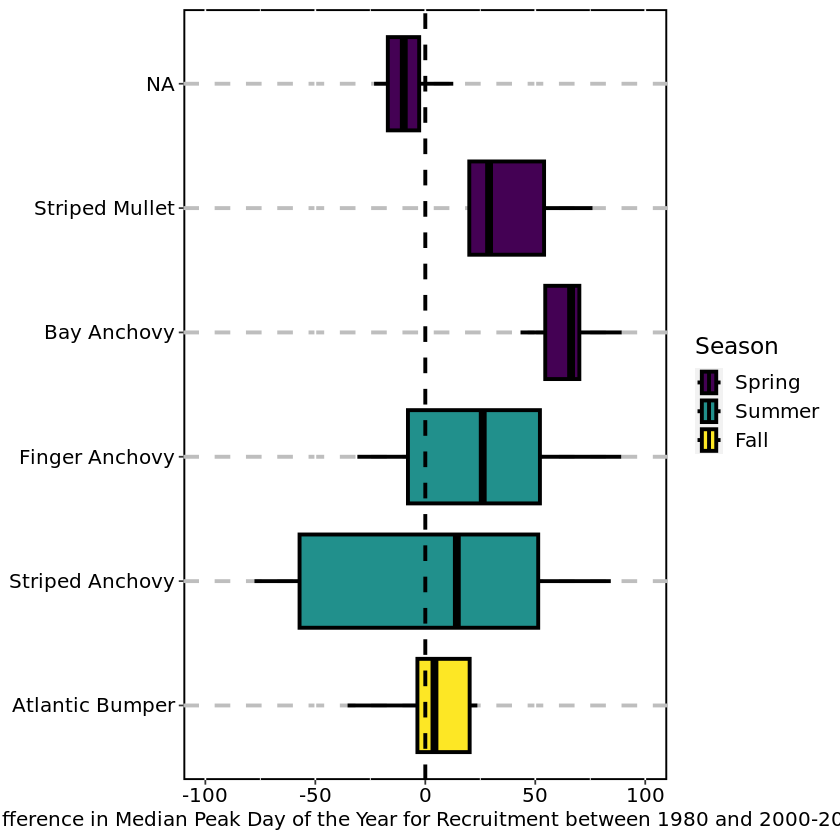

In [27]:
ggplot( p_prey[p_prey$decade == c("2000", "2010"),], 
    aes(y = species, x = diff_median, fill = season)) +
    geom_boxplot(outlier.shape = NA, size = 1.1, color = "black") +
    scale_fill_viridis_d() +
    geom_vline(xintercept = 0, linetype = "dashed", size = 1.1) +
    xlim(-100,100) +
    labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
    theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", size = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), 
        legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

### Does it matter?
`longer object length is not a multiple of shorter object length`
Warning messages in a display notebook look bad.  Take a look.  (Why would it need to be a multiple?  huh?)

In [28]:
nrow(p_prey[p_prey$decade == c("2000", "2010"),])
nrow(p_prey)

Warning message in p_prey$decade == c("2000", "2010"):
“longer object length is not a multiple of shorter object length”


[1] 47

[1] 191

## I would want to track down why there is are non-finite value in the next two plots.
Or make a note to tell the viewer why it's okay.  Non-finite sounds bad.

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”


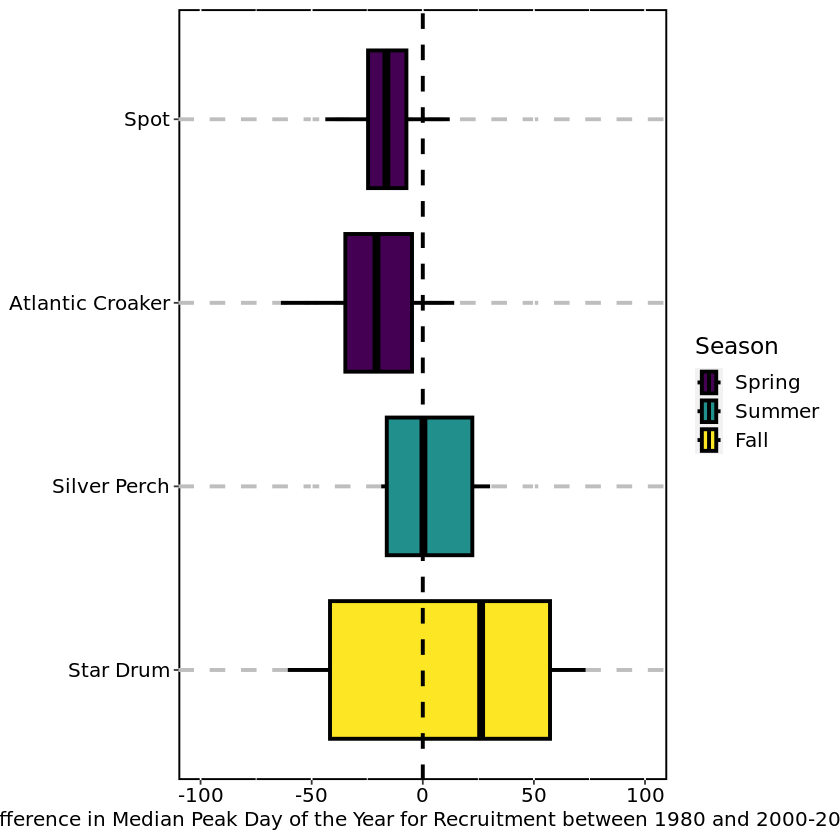

In [29]:
b_prey$species <- factor(b_prey$species, levels = c("Star Drum", "Silver Perch", "Atlantic Croaker", "Spot"))
b_prey$season <- factor(b_prey$season, levels = c("Spring", "Summer", "Fall"))
ggplot(b_prey[b_prey$decade == c("2000", "2010"),], aes(y = species, x = diff_median, fill = season)) +
  geom_boxplot(outlier.shape = NA, size = 1.1, color = "black") +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", size = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(),
        panel.grid.major.y = element_line(color = "grey", size = 1.10, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), 
        axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), 
        legend.text = element_text(color = "black", family = "sans", size = 12))


Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


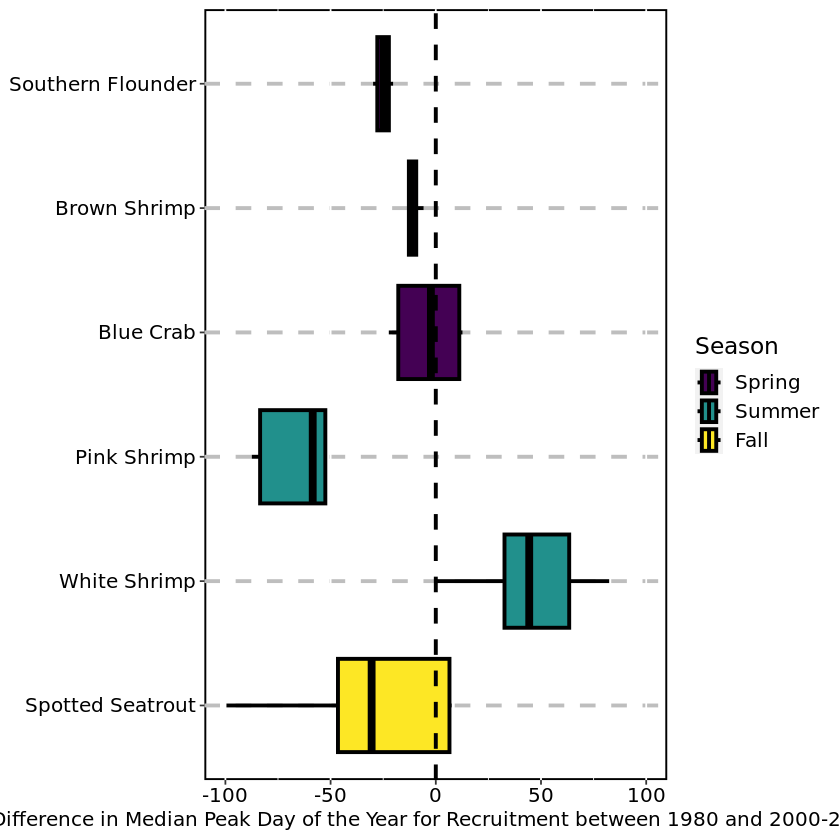

In [30]:
f_spec$species <- factor(f_spec$species, levels = c("Spotted Seatrout", "White Shrimp", "Pink Shrimp", "Blue Crab", "Brown Shrimp", "Southern Flounder"))
f_spec$season <- factor(f_spec$season, levels = c("Spring", "Summer", "Fall"))
ggplot(f_spec[f_spec$decade == c("2000", "2010"),], aes(y = species, x = diff_median, fill = season)) +
  geom_boxplot(outlier.shape = NA, size = 1.1, color = "black") +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", size = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), 
        panel.grid.major.y = element_line(color = "grey", size = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), 
        legend.title = element_text(color = "black", family = "sans", size = 14), 
        legend.text = element_text(color = "black", family = "sans", size = 12))